In [1]:
import pandas as pd
import requests
import os
import shutil

In [ ]:
csv_disease=pd.read_csv("fitzpatrick17k.csv")
csv_disease.head(3)

In [ ]:
df_allergic=csv_disease[csv_disease["label"]=="allergic contact dermatitis"]
df_allergic.reset_index(inplace=True)
df_allergic["pic_name"]=df_allergic["label"].replace(' ', '_', regex=True)+"_"+df_allergic.index.astype("str")
df_allergic.head(3)

In [ ]:
dict(zip(df_allergic.pic_name, df_allergic.url))

In [ ]:
csv_disease.groupby("nine_partition_label")["md5hash"].count()

In [ ]:
csv_disease.groupby("label")["md5hash"].count().sort_values(ascending=False).head(20)

In [ ]:
csv_disease.groupby("three_partition_label")["md5hash"].count()

In [ ]:
df=csv_disease[csv_disease["nine_partition_label"]=="inflammatory"]
df

In [ ]:
df.groupby("label")["md5hash"].count().sort_values(ascending=False).to_dict()

In [ ]:
disease_list = [
    "psoriasis",
    "allergic contact dermatitis",
    ["lupus erythematosus", "lupus subacute"],
    "folliculitis",
    "scabies",
    "photodermatoses",
    ["acne vulgaris", "acne"],
    ["eczema", "dyshidrotic eczema"],
    "seborrheic dermatitis"
]

In [ ]:
def cln_data(data, data_list):
    for i in data_list:
        if isinstance(i, list):
            df = data[data["label"].isin(i)]
            disease_name = '_'.join(i)
        else:
            df = data[data["label"] == i]
            disease_name = i

        df.reset_index(inplace=True)
        df["pic_name"] = df["md5hash"]
        data_dict = dict(zip(df["pic_name"], df["url"]))

        folder_path = f"./disease/{disease_name.replace(' ', '_', )}"
        os.makedirs(folder_path, exist_ok=True)  # Create folder if it doesn't exist

        for pic_name, url in data_dict.items():
            filename = f"{pic_name.replace(' ', '_', )}.jpg"
            file_path = os.path.join(folder_path, filename)

            try:
                headers = {'User-Agent': 'Your Custom User-Agent'}
                response = requests.get(url, headers=headers)

                response.raise_for_status()  # Check for any HTTP errors

                with open(file_path, 'wb') as file:
                    file.write(response.content)

                print(f"Image downloaded: {file_path}")

            except requests.exceptions.RequestException as e:
                print(f"Error downloading image from {url}: {str(e)}")


In [ ]:
cln_data(csv_disease, disease_list)

In [134]:
csv_cancer=pd.read_csv("./metadata.csv")
csv_cancer

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,...,NaN,NEV,False,False,False,False,False,False,PAT_1516_1765_530.png,False
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,5.0,BCC,True,True,False,True,True,True,PAT_46_881_939.png,True
2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1545_1867_547.png,False
3,PAT_1989,4061,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1989_4061_934.png,False
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,...,5.0,BCC,True,True,False,False,True,True,PAT_684_1302_588.png,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,PAT_1708,3156,NaN,NaN,NaN,NaN,73,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1708_3156_175.png,False
2294,PAT_46,880,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,12.0,BCC,True,True,False,True,False,False,PAT_46_880_140.png,True
2295,PAT_1343,1217,NaN,NaN,NaN,NaN,74,NaN,NaN,NaN,...,NaN,SEK,False,False,False,False,False,False,PAT_1343_1217_404.png,False
2296,PAT_326,690,False,False,POMERANIA,POMERANIA,58,True,FEMALE,True,...,4.0,BCC,True,False,False,False,False,True,PAT_326_690_823.png,True


In [135]:
csv_cancer.groupby("diagnostic")["img_id"].count()

diagnostic
ACK    730
BCC    845
MEL     52
NEV    244
SCC    192
SEK    235
Name: img_id, dtype: int64

In [136]:
csv_cancer = csv_cancer.drop(csv_cancer[csv_cancer["diagnostic"] == "MEL"].index)
csv_cancer

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,...,NaN,NEV,False,False,False,False,False,False,PAT_1516_1765_530.png,False
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,5.0,BCC,True,True,False,True,True,True,PAT_46_881_939.png,True
2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1545_1867_547.png,False
3,PAT_1989,4061,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1989_4061_934.png,False
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,...,5.0,BCC,True,True,False,False,True,True,PAT_684_1302_588.png,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,PAT_1708,3156,NaN,NaN,NaN,NaN,73,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1708_3156_175.png,False
2294,PAT_46,880,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,12.0,BCC,True,True,False,True,False,False,PAT_46_880_140.png,True
2295,PAT_1343,1217,NaN,NaN,NaN,NaN,74,NaN,NaN,NaN,...,NaN,SEK,False,False,False,False,False,False,PAT_1343_1217_404.png,False
2296,PAT_326,690,False,False,POMERANIA,POMERANIA,58,True,FEMALE,True,...,4.0,BCC,True,False,False,False,False,True,PAT_326_690_823.png,True


In [137]:
def move_images(data, source_folder, destination_parent_folder):
    unique_diagnoses = data["diagnostic"].unique()

    # Create destination folders for each unique diagnosis
    for diagnosis in unique_diagnoses:
        destination_folder = os.path.join(destination_parent_folder, diagnosis)
        os.makedirs(destination_folder, exist_ok=True)

    # Move files to the respective destination folders
    for index, row in data.iterrows():
        img_id = row['img_id']
        diagnostic = row['diagnostic']
        file_name = img_id
        source_path = os.path.join(source_folder, file_name)
        destination_folder = os.path.join(destination_parent_folder, diagnostic)
        destination_path = os.path.join(destination_folder, file_name)

        if os.path.exists(source_path):
            shutil.move(source_path, destination_path)
            print(f"Moved {file_name} to {destination_folder}/{file_name}")
        else:
            print(f"File {file_name} not found in {source_folder}")

In [138]:
move_images(csv_cancer, "./cancer/phot", "./zr7vgbcyr2-1")

File PAT_1516_1765_530.png not found in ./cancer/phot
File PAT_46_881_939.png not found in ./cancer/phot
File PAT_1545_1867_547.png not found in ./cancer/phot
File PAT_1989_4061_934.png not found in ./cancer/phot
File PAT_684_1302_588.png not found in ./cancer/phot
File PAT_1549_1882_230.png not found in ./cancer/phot
File PAT_778_1471_835.png not found in ./cancer/phot
File PAT_117_179_983.png not found in ./cancer/phot
File PAT_1995_4080_695.png not found in ./cancer/phot
File PAT_705_4015_413.png not found in ./cancer/phot
File PAT_2140_4726_141.png not found in ./cancer/phot
File PAT_967_1827_247.png not found in ./cancer/phot
File PAT_2088_4524_465.png not found in ./cancer/phot
File PAT_636_1204_521.png not found in ./cancer/phot
File PAT_38_54_234.png not found in ./cancer/phot
File PAT_741_1401_619.png not found in ./cancer/phot
File PAT_380_1540_959.png not found in ./cancer/phot
File PAT_1783_3414_120.png not found in ./cancer/phot
File PAT_759_1538_566.png not found in ./can

In [170]:
csv_cancer=pd.read_csv("./metadata.csv")
csv_cancer

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,...,NaN,NEV,False,False,False,False,False,False,PAT_1516_1765_530.png,False
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,5.0,BCC,True,True,False,True,True,True,PAT_46_881_939.png,True
2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1545_1867_547.png,False
3,PAT_1989,4061,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1989_4061_934.png,False
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,...,5.0,BCC,True,True,False,False,True,True,PAT_684_1302_588.png,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,PAT_1708,3156,NaN,NaN,NaN,NaN,73,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1708_3156_175.png,False
2294,PAT_46,880,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,12.0,BCC,True,True,False,True,False,False,PAT_46_880_140.png,True
2295,PAT_1343,1217,NaN,NaN,NaN,NaN,74,NaN,NaN,NaN,...,NaN,SEK,False,False,False,False,False,False,PAT_1343_1217_404.png,False
2296,PAT_326,690,False,False,POMERANIA,POMERANIA,58,True,FEMALE,True,...,4.0,BCC,True,False,False,False,False,True,PAT_326_690_823.png,True


In [169]:
csv_cancer_= csv_cancer.dropna()
"""
columns_to_fill = ["smoke", "drink", "background_father", "background_mother", "pesticide", "gender", "skin_cancer_history", "cancer_history", "has_piped_water","has_sewage_system", "fitspatrick", "diameter_1", "diameter_2"]

for column in columns_to_fill:
    mode_value = csv_cancer[column].mode()[0]
    csv_cancer[column].fillna(mode_value, inplace=True)
"""

'\ncolumns_to_fill = ["smoke", "drink", "background_father", "background_mother", "pesticide", "gender", "skin_cancer_history", "cancer_history", "has_piped_water","has_sewage_system", "fitspatrick", "diameter_1", "diameter_2"]\n\nfor column in columns_to_fill:\n    mode_value = csv_cancer[column].mode()[0]\n    csv_cancer[column].fillna(mode_value, inplace=True)\n'

In [171]:
X = csv_cancer_.drop(["diagnostic", "patient_id", "lesion_id","img_id", "biopsed"], axis=1)
y = csv_cancer_["diagnostic"]

from sklearn.model_selection import train_test_split
X_encoded = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, stratify=y, random_state=42)

In [172]:
from sklearn.ensemble import RandomForestClassifier

feature_names = X_encoded.columns
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [173]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.008 seconds


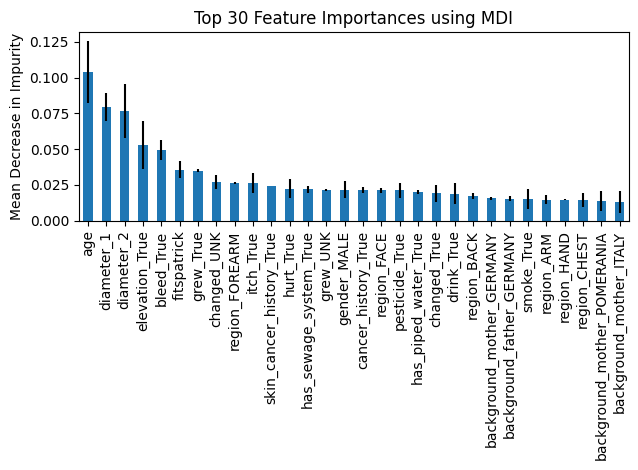

In [174]:
import pandas as pd
import matplotlib.pyplot as plt

forest_importances = pd.Series(importances, index=feature_names)
forest_importances = forest_importances.sort_values(ascending=False)

top_n = 30
forest_importances = forest_importances[:top_n]
std = std[:top_n]

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Top {} Feature Importances using MDI".format(top_n))
ax.set_ylabel("Mean Decrease in Impurity")
fig.tight_layout()
plt.show()

In [175]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)
forest_importances = forest_importances.sort_values(ascending=False)

Elapsed time to compute the importances: 3.250 seconds


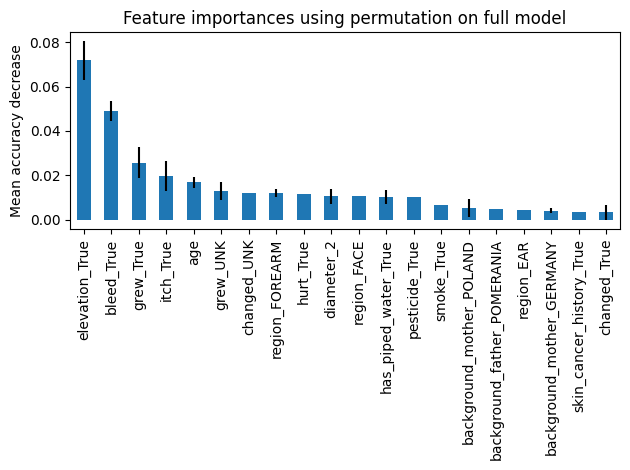

In [176]:
fig, ax = plt.subplots()
top_n = 20
forest_importances = forest_importances[:top_n]
forest_importances.plot.bar(yerr=result.importances_std[:top_n] , ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [250]:
csv_cancer=pd.read_csv("./metadata.csv")
#csv_cancer=csv_cancer[["age", "lesion_id", "elevation", "has_sewage_system", "fitspatrick", "pesticide",  "skin_cancer_history","diameter_1", "diameter_2", "itch", "grew", "hurt", "bleed", "region", "gender", "skin_cancer_history", "diagnostic"]]


In [251]:
csv_cancer            #["age", "lesion_id", "elevation", "has_sewage_system", "has_piped_water","fitspatrick", "pesticide", "background_father", "background_mother", "skin_cancer_history","diameter_1", "diameter_2", "itch", "grew", "hurt", "bleed", "region", "gender", "skin_cancer_history", "diagnostic"]

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,...,NaN,NEV,False,False,False,False,False,False,PAT_1516_1765_530.png,False
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,5.0,BCC,True,True,False,True,True,True,PAT_46_881_939.png,True
2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1545_1867_547.png,False
3,PAT_1989,4061,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1989_4061_934.png,False
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,...,5.0,BCC,True,True,False,False,True,True,PAT_684_1302_588.png,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,PAT_1708,3156,NaN,NaN,NaN,NaN,73,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1708_3156_175.png,False
2294,PAT_46,880,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,12.0,BCC,True,True,False,True,False,False,PAT_46_880_140.png,True
2295,PAT_1343,1217,NaN,NaN,NaN,NaN,74,NaN,NaN,NaN,...,NaN,SEK,False,False,False,False,False,False,PAT_1343_1217_404.png,False
2296,PAT_326,690,False,False,POMERANIA,POMERANIA,58,True,FEMALE,True,...,4.0,BCC,True,False,False,False,False,True,PAT_326_690_823.png,True


In [252]:
import pandas as pd
import numpy as np

def filter_rows(df, diagnostic_col):
    filtered_df = df[df[diagnostic_col] != 'SEK']
    filtered_df.replace("UNK", np.nan, inplace=True)

    selected_rows = []

    grouped = filtered_df.groupby(diagnostic_col)

    for group_name, group_df in grouped:
        group_df['nan_count'] = group_df.isna().sum(axis=1)
        
        sorted_group = group_df.sort_values(by='nan_count', ascending=True)
        
        selected_rows.append(sorted_group.head(80))

    filtered_df = pd.concat(selected_rows, ignore_index=True)
    
    filtered_df = filtered_df.reset_index(drop=True)
        
    return filtered_df

In [253]:
filtered_df = filter_rows(csv_cancer, 'diagnostic')
filtered_df

/tmp/ipykernel_20638/3508686573.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.replace("UNK", np.nan, inplace=True)


,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed,nan_count
0,PAT_169,694,False,True,NETHERLANDS,GERMANY,44,True,MALE,False,...,ACK,True,False,False,False,False,False,PAT_169_694_411.png,False,0
1,PAT_38,1003,False,False,GERMANY,GERMANY,53,True,MALE,True,...,ACK,True,False,False,False,False,False,PAT_38_1003_68.png,True,0
2,PAT_65,101,False,False,BRASIL,GERMANY,61,False,FEMALE,False,...,ACK,False,False,False,False,False,False,PAT_65_101_847.png,True,0
3,PAT_69,1053,False,False,GERMANY,GERMANY,66,False,FEMALE,False,...,ACK,True,False,True,False,False,True,PAT_69_1053_540.png,True,0
4,PAT_260,400,False,False,POMERANIA,POMERANIA,78,True,FEMALE,True,...,ACK,True,False,True,False,True,True,PAT_260_400_566.png,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,PAT_216,331,True,True,POMERANIA,POMERANIA,71,True,MALE,False,...,SCC,False,False,False,False,False,False,PAT_216_331_678.png,True,0
368,PAT_365,751,False,True,GERMANY,GERMANY,70,False,MALE,False,...,SCC,True,True,False,False,False,True,PAT_365_751_709.png,True,0
369,PAT_771,1488,True,True,ITALY,ITALY,69,False,MALE,False,...,SCC,True,True,False,True,False,True,PAT_771_1488_562.png,True,0
370,PAT_319,680,True,False,GERMANY,GERMANY,62,False,FEMALE,True,...,SCC,True,True,False,False,True,True,PAT_319_680_832.png,True,0


In [254]:
filtered_df.sort_values(by='nan_count', ascending=False).head(20)

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed,nan_count
290,PAT_1960,3957,NaN,NaN,NaN,NaN,34,NaN,NaN,NaN,...,NEV,True,True,True,True,False,True,PAT_1960_3957_864.png,False,13
291,PAT_1484,1682,NaN,NaN,NaN,NaN,28,NaN,NaN,NaN,...,NEV,False,False,False,False,False,True,PAT_1484_1682_240.png,False,13
289,PAT_1754,3308,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,...,NEV,False,True,False,True,False,False,PAT_1754_3308_783.png,False,13
288,PAT_1624,2807,NaN,NaN,NaN,NaN,22,NaN,NaN,NaN,...,NEV,True,True,False,False,False,True,PAT_1624_2807_679.png,False,13
287,PAT_1940,3901,NaN,NaN,NaN,NaN,31,NaN,NaN,NaN,...,NEV,False,True,False,False,False,True,PAT_1940_3901_900.png,False,13
286,PAT_890,1694,False,True,GERMANY,ITALY,55,True,FEMALE,True,...,NEV,NaN,NaN,NaN,NaN,NaN,NaN,PAT_890_1694_29.png,True,6
280,PAT_665,1262,False,False,NaN,NaN,30,False,FEMALE,True,...,NEV,False,NaN,False,NaN,False,True,PAT_665_1262_774.png,True,4
285,PAT_615,1167,False,False,NaN,NaN,16,False,FEMALE,False,...,NEV,False,NaN,False,NaN,False,True,PAT_615_1167_722.png,True,4
284,PAT_621,1183,False,False,NaN,NaN,34,False,MALE,False,...,NEV,False,NaN,False,NaN,False,False,PAT_621_1183_56.png,True,4
283,PAT_900,1711,False,True,NaN,NaN,39,False,FEMALE,False,...,NEV,False,NaN,False,NaN,False,False,PAT_900_1711_622.png,True,4


In [255]:
filtered_df_NEV=filtered_df[filtered_df["diagnostic"]=="NEV"]
filtered_df_NEV

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed,nan_count
212,PAT_756,1495,False,True,ITALY,ITALY,27,False,FEMALE,False,...,NEV,True,True,False,True,False,False,PAT_756_1495_858.png,True,0
213,PAT_793,1512,False,False,ITALY,ITALY,36,False,MALE,False,...,NEV,True,False,False,False,False,False,PAT_793_1512_513.png,True,0
214,PAT_61,299,True,False,ITALY,ITALY,50,False,FEMALE,False,...,NEV,False,True,False,False,False,True,PAT_61_299_74.png,False,0
215,PAT_72,110,False,False,POMERANIA,POMERANIA,36,False,FEMALE,True,...,NEV,False,True,False,False,False,False,PAT_72_110_944.png,True,0
216,PAT_627,1188,False,False,POMERANIA,POMERANIA,32,False,FEMALE,True,...,NEV,True,True,False,True,False,False,PAT_627_1188_755.png,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,PAT_1940,3901,NaN,NaN,NaN,NaN,31,NaN,NaN,NaN,...,NEV,False,True,False,False,False,True,PAT_1940_3901_900.png,False,13
288,PAT_1624,2807,NaN,NaN,NaN,NaN,22,NaN,NaN,NaN,...,NEV,True,True,False,False,False,True,PAT_1624_2807_679.png,False,13
289,PAT_1754,3308,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,...,NEV,False,True,False,True,False,False,PAT_1754_3308_783.png,False,13
290,PAT_1960,3957,NaN,NaN,NaN,NaN,34,NaN,NaN,NaN,...,NEV,True,True,True,True,False,True,PAT_1960_3957_864.png,False,13


In [256]:
columns_to_remove = ["lesion_id", "patient_id", "img_id", "biopsed"]
columns_name = filtered_df.columns.tolist()
for col in columns_to_remove:
    columns_name.remove(col)


In [257]:
filtered_df.columns

Index(['patient_id', 'lesion_id', 'smoke', 'drink', 'background_father',
       'background_mother', 'age', 'pesticide', 'gender',
       'skin_cancer_history', 'cancer_history', 'has_piped_water',
       'has_sewage_system', 'fitspatrick', 'region', 'diameter_1',
       'diameter_2', 'diagnostic', 'itch', 'grew', 'hurt', 'changed', 'bleed',
       'elevation', 'img_id', 'biopsed', 'nan_count'],
      dtype='object')

In [258]:
for column in columns_name:
    mode_value = filtered_df_NEV[column].mode()[0]
    filtered_df.loc[filtered_df["diagnostic"] == "NEV", column] = filtered_df.loc[filtered_df["diagnostic"] == "NEV", column].fillna(mode_value)

In [278]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder

# Create a copy of the DataFrame without the columns to remove
filtered_df_copy = filtered_df.drop(columns=columns_to_remove)

# Identify categorical columns
categorical_columns = ['background_father', 'background_mother']

# Convert categorical columns to one-hot encoded representation
encoder = OneHotEncoder()
filtered_df_encoded = pd.get_dummies(filtered_df_copy, columns=categorical_columns)

# Separate categorical and numerical columns
numerical_columns = filtered_df_encoded.select_dtypes(include='number').columns

# Initialize the KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Fit and transform the numerical columns with the KNN imputer
imputed_values = knn_imputer.fit_transform(filtered_df_encoded[numerical_columns])

# Convert the imputed values array back to a DataFrame
imputed_df = pd.DataFrame(imputed_values, columns=numerical_columns)

# Update the NaN values in the original DataFrame with the imputed values
filtered_df.update(imputed_df)


In [279]:
filtered_df['nan_count'] = filtered_df.isna().sum(axis=1)
filtered_df.sort_values(by='nan_count', ascending=False).head(20)

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed,nan_count
211,PAT_433,852,False,True,GERMANY,GERMANY,30,False,MALE,False,...,MEL,False,NaN,False,NaN,False,NaN,PAT_433_852_20.png,True,3
200,PAT_895,1699,False,False,GERMANY,PORTUGAL,65,False,FEMALE,False,...,MEL,False,NaN,False,NaN,False,False,PAT_895_1699_872.png,True,2
210,PAT_656,1246,False,False,NaN,NaN,58,False,MALE,False,...,MEL,True,True,False,True,False,False,PAT_656_1246_489.png,True,2
209,PAT_995,1867,False,False,NaN,NaN,49,False,FEMALE,False,...,MEL,False,True,False,True,False,True,PAT_995_1867_165.png,True,2
208,PAT_995,1867,False,False,NaN,NaN,49,False,FEMALE,False,...,MEL,False,True,False,True,False,True,PAT_995_1867_5.png,True,2
207,PAT_717,1347,False,False,GERMANY,GERMANY,61,True,FEMALE,False,...,MEL,False,NaN,False,NaN,False,False,PAT_717_1347_899.png,True,2
206,PAT_936,1772,False,False,POMERANIA,POMERANIA,63,False,MALE,False,...,MEL,False,NaN,False,NaN,False,False,PAT_936_1772_886.png,True,2
205,PAT_614,1166,False,False,NaN,NaN,56,False,FEMALE,False,...,MEL,False,True,False,True,False,False,PAT_614_1166_885.png,True,2
203,PAT_894,1679,False,False,GERMANY,GERMANY,65,False,MALE,False,...,MEL,False,NaN,False,NaN,False,True,PAT_894_1679_640.png,True,2
202,PAT_710,1330,False,False,SPAIN,BRAZIL,53,True,FEMALE,True,...,MEL,False,NaN,False,NaN,False,False,PAT_710_1330_243.png,True,2


In [249]:
filtered_df=filtered_df[["age", "lesion_id", "elevation", "has_sewage_system", "fitspatrick", "pesticide",  "skin_cancer_history","diameter_1", "diameter_2", "itch", "grew", "hurt", "bleed", "region", "gender", "diagnostic"]]
filtered_df

,age,lesion_id,elevation,has_sewage_system,fitspatrick,pesticide,skin_cancer_history,diameter_1,diameter_2,itch,grew,hurt,bleed,region,gender,diagnostic
0,44,694,0.0,0.0,2.0,1.0,0.0,6.0,6.0,1.0,0.0,0.0,0.0,3.0,1.0,0.0
1,53,1003,0.0,0.0,1.0,1.0,1.0,9.0,6.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,61,101,0.0,1.0,2.0,0.0,0.0,10.0,10.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,66,1053,1.0,0.0,2.0,0.0,0.0,11.0,10.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,78,400,1.0,0.0,1.0,1.0,1.0,10.0,10.0,1.0,0.0,1.0,1.0,5.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,71,331,0.0,0.0,3.0,1.0,0.0,10.0,6.0,0.0,0.0,0.0,0.0,7.0,1.0,4.0
368,70,751,1.0,1.0,2.0,0.0,0.0,11.0,9.0,1.0,1.0,0.0,0.0,5.0,1.0,4.0
369,69,1488,1.0,1.0,3.0,0.0,0.0,7.0,7.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0
370,62,680,1.0,1.0,2.0,0.0,1.0,11.0,6.0,1.0,1.0,0.0,1.0,3.0,0.0,4.0


In [ ]:
filtered_df_cat=["elevation", "has_sewage_system", "pesticide",  "skin_cancer_history", "itch", "grew", "hurt", "bleed", "region", "gender"]
filtered_df_num=["age", "lesion_id", "fitspatrick", "diameter_1", "diameter_2"]

features=filtered_df_cat+filtered_df_num

target_variable = 'diagnostic'

In [ ]:
X = filtered_df.drop(["diagnostic"], axis=1)
y = filtered_df["diagnostic"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [ ]:
# data pre-processing stack
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import time

In [ ]:
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])

In [ ]:
categorical_transformer = Pipeline(steps=[('one-hot-encode', OneHotEncoder(drop='first'))])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[("num", numerical_transformer, filtered_df_num),("cat", categorical_transformer, filtered_df_cat)])

In [ ]:
estimator = Pipeline(steps=[('preprocessor', preprocessor),('rf', RandomForestRegressor())])
param_grid = {'rf__n_estimators': [200,300,500,1000],
              'rf__max_depth': [5,10,20,50,100],
              'rf__min_samples_split': [2, 5, 11]
             }

In [ ]:
gscv = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1, verbose=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

In [ ]:
X_train

In [ ]:
y.isna().sum()

In [ ]:
ti = time.time()
gscv.fit(X_train, y_train_encoded)
tf = time.time()

In [ ]:
gscv.best_params_

In [ ]:
gscv.best_score_

In [ ]:
best_model_1 = gscv.best_estimator_
best_model_1

In [ ]:
training_score_1 = best_model_1.score(X_train,y_train_encoded)

test_score_1 = best_model_1.score(X_test,y_test_encoded)

print(f'Train score: {round(training_score_1,6)}')
print(f'Test score : {round(test_score_1,6)}')